# Ejercicios

1. Observe sus comportamientos en la casa, en la universidad y en el medio de transporte que utiliza. Encuentre, para cada uno de estos escenarios sus reglas básicas

Para este caso se usara un diagrama de flujo para representar la toma de decisiones y la reglas que presenta la rutina de transporte de uno de los miembros del equipo.
![Rutina de transporte](https://raw.githubusercontent.com/Jbarreraro/Inteligencia_artificial_y_mini_robots/refs/heads/main/Automatas_celulares/Images/Automatas_celulares.drawio.png)

2. Suponga una enfermedad, o un incendio forestal, o una moda, desarrolle un modelo de difusión usando ACs probabilísticos. O simule un robot con dos ruedas que evite obstáculos. Use LLMs.




Se aplicara un modelo de progagacion para una moda en una poblacion en la cual se tienen los siguientes 4 estados en relacion a la moda que se esta propagando.
 - Indiferente
 - Curioso
 - Convencido
 - Saturado

Teniendo en cuenta los estados anteriores, se tienen las siguientes reglas.
 - Indiferente a curioso: Si al menos N vecinos estan "Convencidos", se tiene una probailidad (p_exp) de volverse curioso.
 - Curioso a convencido: Se tiene una probabilidad (p_conv) de pasar a estado convencido.
 - Convencido a saturado: Luego de un tiempo en estado convencido se vulver saturado
 - Saturado a neutro: Se tiene una probabilidad (p_olv) de olvidar la moda y volver al estado neutro.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [34]:
# Parámetros
grid_size = 30
steps = 30
# Probabilidades
p_expose = 1
p_convince = 1
p_forgot = 0.1
# Condiciones
umbral_conv = 2
t_max = 20  # pasos antes de saturarse

C:\Users\Juan\AppData\Local\Temp\ipykernel_21140\2092793102.py:55: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Set2', 4)  # Definir colores para los 4 estados (Neutro, Curioso, Convencido, Saturado)


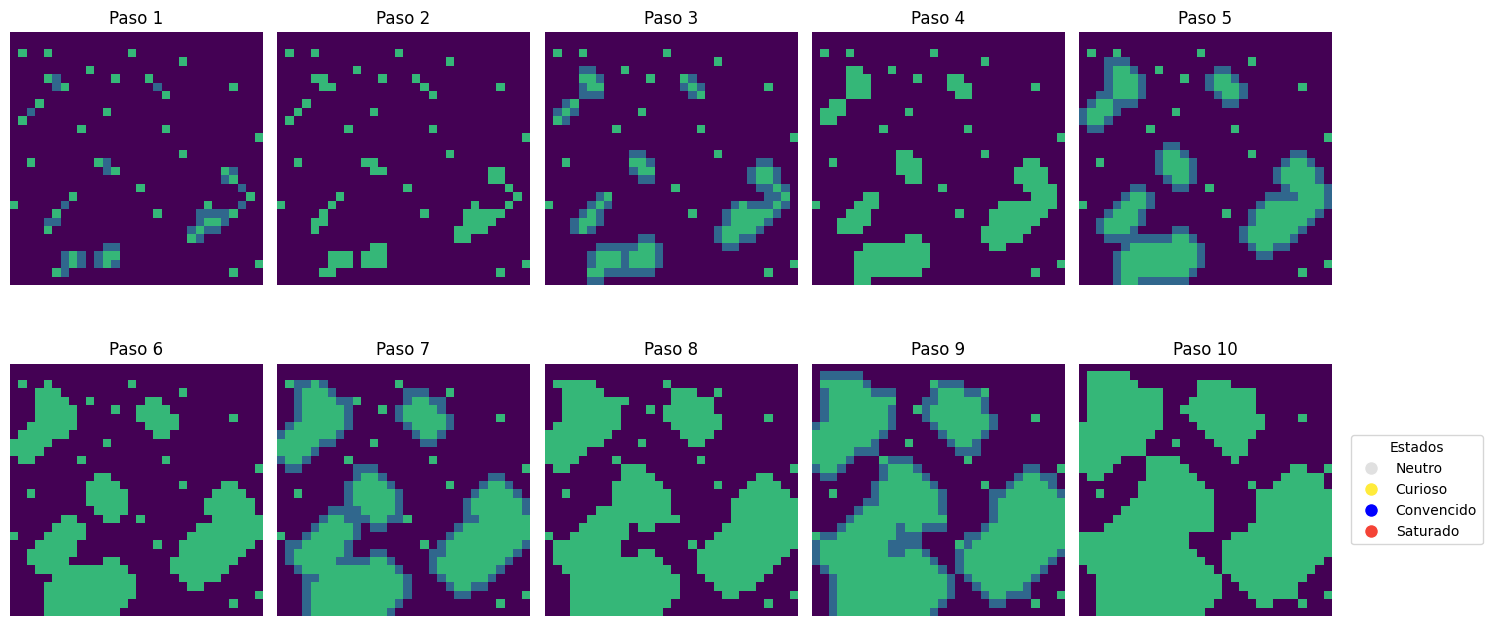

In [35]:
def inicializar():
    # Todos los individuos comienzan en el estado Neutro (0)
    estado = np.zeros((grid_size, grid_size), dtype=int)
    tiempo_conv = np.zeros_like(estado)
    
    # Hacer que algunos individuos inicien como Convencidos (2)
    num_convencidos = int(0.05 * grid_size * grid_size)  # 5% de la población empieza convencida
    for _ in range(num_convencidos):
        x, y = np.random.randint(0, grid_size, 2)
        estado[x, y] = 2
    
    return estado, tiempo_conv

def contar_vecinos_estado(estado, i, j, valor):
    vecinos = estado[max(i-1,0):min(i+2,grid_size), max(j-1,0):min(j+2,grid_size)]
    return np.sum(vecinos == valor) - (estado[i, j] == valor)

def actualizar(estado, tiempo_conv):
    nuevo_estado = estado.copy()
    nuevo_tiempo = tiempo_conv.copy()

    for i in range(grid_size):
        for j in range(grid_size):
            est = estado[i, j]
            vecinos_conv = contar_vecinos_estado(estado, i, j, 2)

            if est == 0:  # Neutro
                if vecinos_conv >= umbral_conv and np.random.rand() < p_expose:
                    nuevo_estado[i, j] = 1

            elif est == 1:  # Curioso
                if np.random.rand() < p_convince:
                    nuevo_estado[i, j] = 2
                    nuevo_tiempo[i, j] = 0

            elif est == 2:  # Convencido
                nuevo_tiempo[i, j] += 1
                if nuevo_tiempo[i, j] >= t_max:
                    nuevo_estado[i, j] = 3

            elif est == 3:  # Saturado
                if np.random.rand() < p_forgot:
                    nuevo_estado[i, j] = 0

    return nuevo_estado, nuevo_tiempo

# Inicialización
estado, tiempo_conv = inicializar()

# Configurar subplots: Aseguramos que hay suficientes subgráficos para los pasos.
fig, axes = plt.subplots(2, 5, figsize=(15, 7))  # 2 filas y 5 columnas
axes = axes.flatten()

# Colormap y convenciones de colores
cmap = plt.cm.get_cmap('Set2', 4)  # Definir colores para los 4 estados (Neutro, Curioso, Convencido, Saturado)
estado_labels = ['Neutro', 'Curioso', 'Convencido', 'Saturado']
colors = ['#E0E0E0', '#FFEB3B', '#0000FF', '#F44336']  # Gris, Amarillo, Verde, Rojo

# Simular y mostrar distintos pasos
for i in range(min(steps, len(axes))):  # Aseguramos que no se exceda el número de subgráficos
    estado, tiempo_conv = actualizar(estado, tiempo_conv)
    ax = axes[i]
    ax.imshow(estado, vmin=0, vmax=3)
    ax.set_title(f"Paso {i+1}")
    ax.axis('off')

# Añadir leyenda
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in colors]
plt.legend(handles, estado_labels, title="Estados", bbox_to_anchor=(1.05, 0.5), loc='center left')

# Ajustar el layout y mostrar la figura
plt.tight_layout()
plt.show()

3.Tome el plano de una ciudad pequeña y localice, por ejemplo, las droguerías, o colegios ¿es posible que falte alguno en la ciudad? Incluya información adicional como densidad de personas. Utilice diagramas de Voronoi.

Para realizar este ejercicio se usaron los centros comerciales de Bogota como objetos de referencia. La cual a fecha de 2023 posee una poblacion de 7,9 millones de habitantes aproximadamente, distribuidos en una superficie de 1776 km^2 para una densidad de poblacion aproximada de 5091 habitantes/km^2.

Imagen de los centros comerciales marcados en el mapa.\
![Rutina de transporte](https://raw.githubusercontent.com/Jbarreraro/Inteligencia_artificial_y_mini_robots/refs/heads/main/Automatas_celulares/Images/cc_bogota.png)\


Imagen del diagrama Voronoi de los centros comerciales de Bogota.\
![Rutina de transporte](https://raw.githubusercontent.com/Jbarreraro/Inteligencia_artificial_y_mini_robots/refs/heads/main/Automatas_celulares/Images/cc_voronoi.png)\